## Import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

## Read Data

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/Shaah-i/Datssets/main/ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Data Validation and pre-processing

In [3]:
df = df.rename(columns={'family_history_with_overweight': 'FHWO',
                           'NObeyesdad' : 'BMI',})

In [4]:
df

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2111 non-null   object 
 1   Age     2111 non-null   float64
 2   Height  2111 non-null   float64
 3   Weight  2111 non-null   float64
 4   FHWO    2111 non-null   object 
 5   FAVC    2111 non-null   object 
 6   FCVC    2111 non-null   float64
 7   NCP     2111 non-null   float64
 8   CAEC    2111 non-null   object 
 9   SMOKE   2111 non-null   object 
 10  CH2O    2111 non-null   float64
 11  SCC     2111 non-null   object 
 12  FAF     2111 non-null   float64
 13  TUE     2111 non-null   float64
 14  CALC    2111 non-null   object 
 15  MTRANS  2111 non-null   object 
 16  BMI     2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


In [6]:
df.describe(include='all')

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


From internet I found out that

* FAVC- Frequent consumption of high caloric food
* FCVC- Frequency of consumption of vegetables
* NCP- Number of main meals
* CAEC- Consumption of food between meals
* CH20- Consumption of water daily
* CALC- Consumption of alcohol
</br>
</br>
* SCC- Calories consumption monitoring
* FAF- Physical activity frequency
* TUE- Time using technology devices
* MTRANS- Transportation used
</br>
</br>
</br>
</br>
NObeyesdad is basically BMI converted to category
* Underweight Less than 18.5
* Normal 18.5 to 24.9
* Overweight 25.0 to 29.9
* Obesity I 30.0 to 34.9
* Obesity II 35.0 to 39.9
* Obesity III Higher than 40

In [7]:
obj_cols= [col for col in df.columns if df[col].dtype== "object"]
obj_cols

['Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'BMI']

In [8]:
df.BMI.value_counts()

BMI
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [9]:
# checking null values

df.isnull().sum()

Gender    0
Age       0
Height    0
Weight    0
FHWO      0
FAVC      0
FCVC      0
NCP       0
CAEC      0
SMOKE     0
CH2O      0
SCC       0
FAF       0
TUE       0
CALC      0
MTRANS    0
BMI       0
dtype: int64

In [10]:
# checking duplicates
df.duplicated().sum()

24

In [11]:
# dropping duplicate values and rechecking
df.drop_duplicates(inplace=True)
df

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [12]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI'],
      dtype='object')

## Data transformation

In [13]:
data= df[df.columns]
data

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
for col in obj_cols:
    print(data[col].value_counts())

Gender
Male      1052
Female    1035
Name: count, dtype: int64
FHWO
yes    1722
no      365
Name: count, dtype: int64
FAVC
yes    1844
no      243
Name: count, dtype: int64
CAEC
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64
SMOKE
no     2043
yes      44
Name: count, dtype: int64
SCC
no     1991
yes      96
Name: count, dtype: int64
CALC
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64
BMI
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64


In [15]:
# replace Gender with numeric values
data.replace({'Female': 0, 'Male': 1}, inplace= True)

In [16]:
# similarly replacing other columns
data.replace({'yes':0, 'no': 1}, inplace=True)
data.replace({'Sometimes':0, 'Frequently':2, 'Always': 3}, inplace=True)
data.replace({'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 'Motorbike': 3, 'Bike': 4}, inplace=True)

In [17]:
# similarly for BMI
data.replace({"Insufficient_Weight": 0, "Normal_Weight": 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6,}, inplace= True)

# I did encoding manually because I wnated to have that order while encoding

In [18]:
data

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,21.000000,1.620000,64.000000,0,1,2.0,3.0,0,1,2.000000,1,0.000000,1.000000,1,0,1
1,0,21.000000,1.520000,56.000000,0,1,3.0,3.0,0,0,3.000000,0,3.000000,0.000000,0,0,1
2,1,23.000000,1.800000,77.000000,0,1,2.0,3.0,0,1,2.000000,1,2.000000,1.000000,2,0,1
3,1,27.000000,1.800000,87.000000,1,1,3.0,3.0,0,1,2.000000,1,2.000000,0.000000,2,2,2
4,1,22.000000,1.780000,89.800000,1,1,2.0,1.0,0,1,2.000000,1,0.000000,0.000000,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,0,0,3.0,3.0,0,1,1.728139,1,1.676269,0.906247,0,0,6
2107,0,21.982942,1.748584,133.742943,0,0,3.0,3.0,0,1,2.005130,1,1.341390,0.599270,0,0,6
2108,0,22.524036,1.752206,133.689352,0,0,3.0,3.0,0,1,2.054193,1,1.414209,0.646288,0,0,6
2109,0,24.361936,1.739450,133.346641,0,0,3.0,3.0,0,1,2.852339,1,1.139107,0.586035,0,0,6


In [19]:
data.describe()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,0.504073,24.353090,1.702674,86.858730,0.174892,0.116435,2.421466,2.701179,0.320077,0.978917,2.004749,0.954001,1.012812,0.663035,0.373263,0.300431,3.132247
std,0.500103,6.368801,0.093186,26.190847,0.379966,0.320823,0.534737,0.764614,0.772300,0.143695,0.608284,0.209533,0.853475,0.608153,0.551399,0.578717,1.985747
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.915937,1.630178,66.000000,0.000000,0.000000,2.000000,2.697467,0.000000,1.000000,1.590922,1.000000,0.124505,0.000000,0.000000,0.000000,1.000000
50%,1.000000,22.847618,1.701584,83.101100,0.000000,0.000000,2.396265,3.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.630866,0.000000,0.000000,3.000000
75%,1.000000,26.000000,1.769491,108.015907,0.000000,0.000000,3.000000,3.000000,0.000000,1.000000,2.466193,1.000000,1.678102,1.000000,1.000000,1.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


## EDA

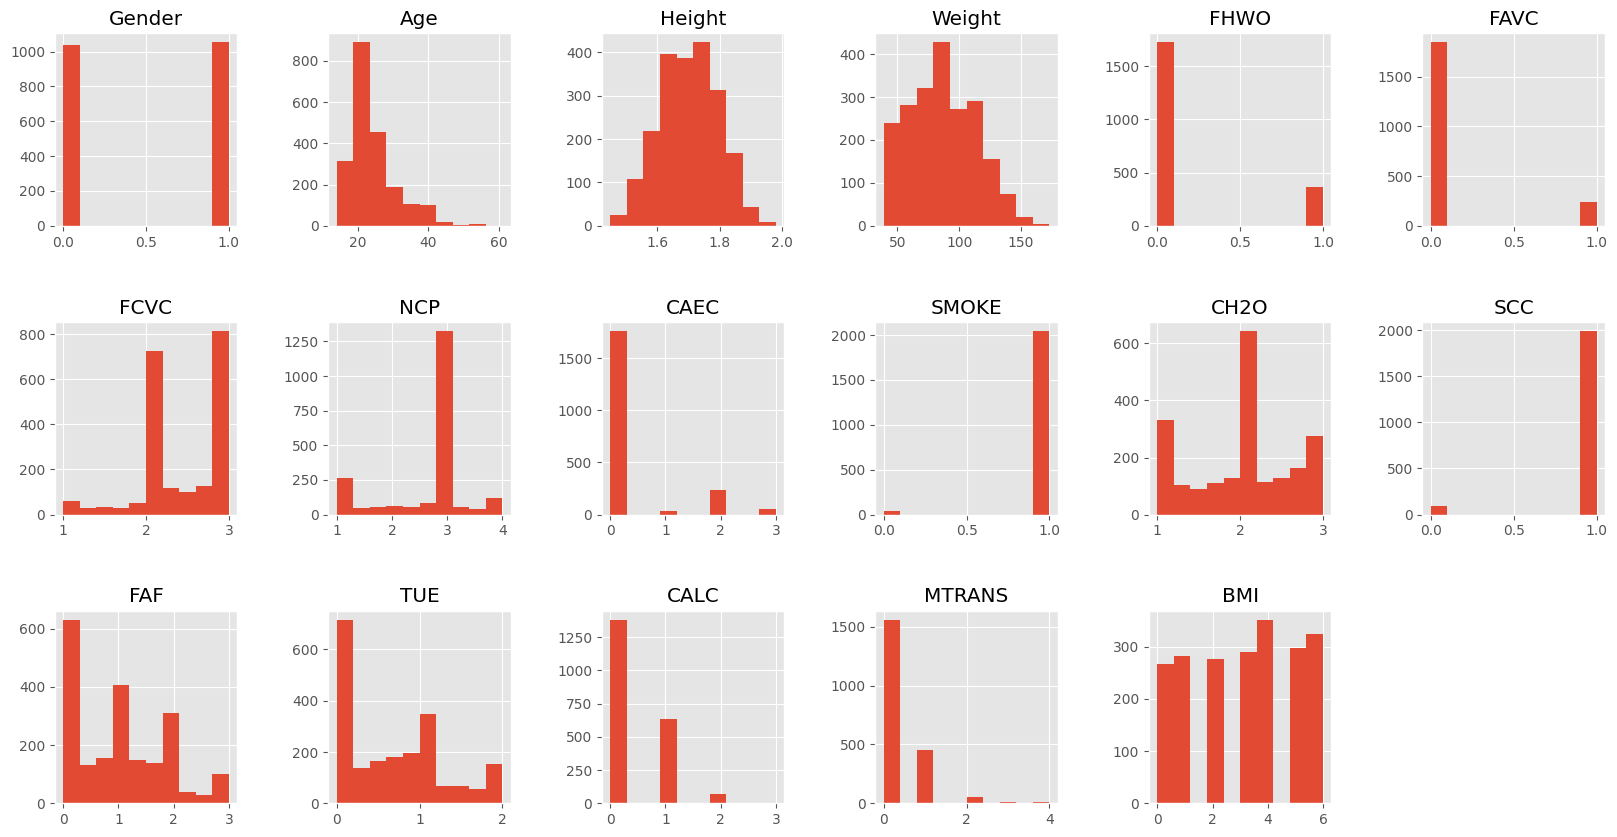

In [20]:
# Menghitung jumlah baris dan kolom yang dibutuhkan
n_cols = len(data.columns)
n_rows = math.ceil(n_cols/6)

# Mengatur ukuran figure
fig, axes = plt.subplots(nrows=n_rows, ncols=6, figsize=(20, 10))

# Mengatur jarak antar subplot
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Menampilkan histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < n_cols:
        ax.hist(data.iloc[:, i], bins=10)
        ax.set_title(data.columns[i])
    else:
        fig.delaxes(ax) # Menghapus subplot yang tersisa

# Menampilkan grafik
plt.show()

In [21]:
corr = data.corr()

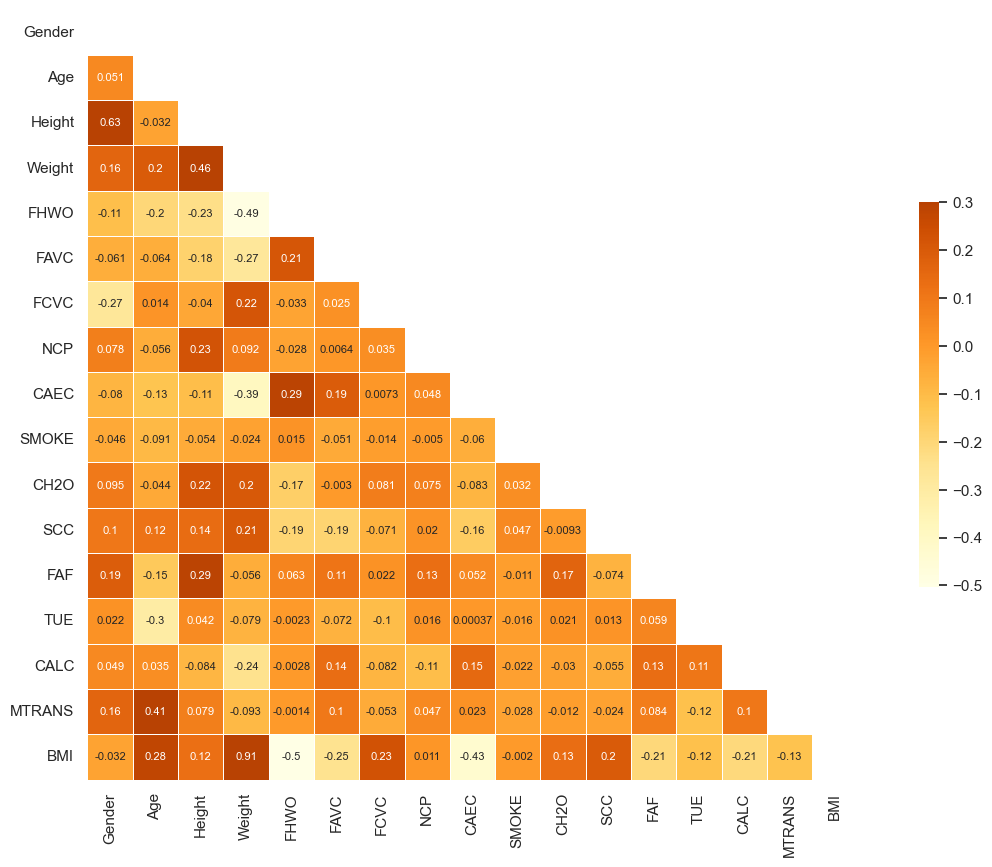

In [22]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(16, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot = True, annot_kws={"size": 8})
plt.savefig('correlation.png', bbox_inches='tight',pad_inches=0)

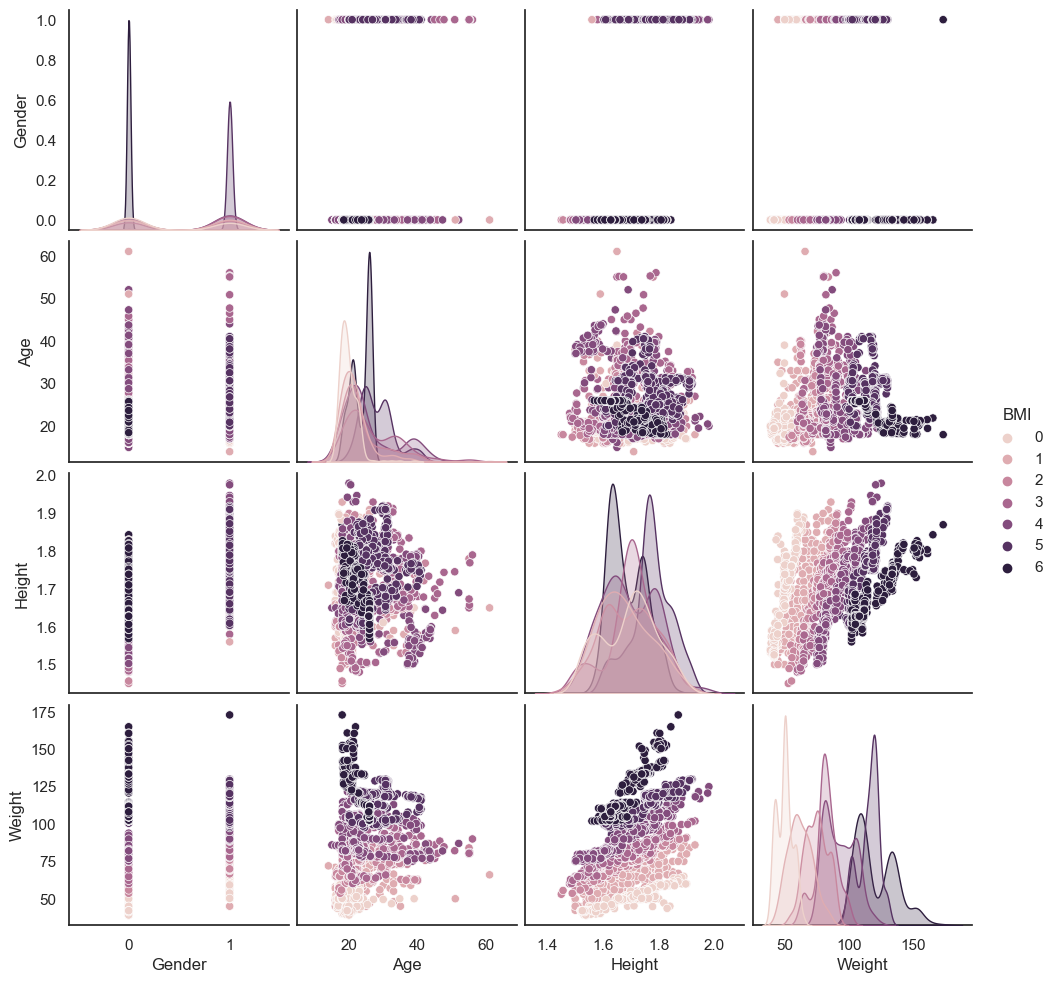

In [23]:
sns.pairplot(data, 
             hue ='BMI', 
             vars = ['Gender','Age', 
                     'Height', 'Weight'])
plt.savefig('pairplot1.png')

## Preparing Data Train and Test

In [24]:
data_input = df.copy()
data_input = data_input.drop(["Gender",'NCP','SMOKE','MTRANS'],axis=1)

In [25]:
obj_cols

['Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'BMI']

In [26]:
obj_cols.remove('Gender')
obj_cols.remove('SMOKE')
obj_cols.remove('MTRANS')
obj_cols.remove('BMI')

In [27]:
data_input

,Age,Height,Weight,FHWO,FAVC,FCVC,CAEC,CH2O,SCC,FAF,TUE,CALC,BMI
0,21.000000,1.620000,64.000000,yes,no,2.0,Sometimes,2.000000,no,0.000000,1.000000,no,Normal_Weight
1,21.000000,1.520000,56.000000,yes,no,3.0,Sometimes,3.000000,yes,3.000000,0.000000,Sometimes,Normal_Weight
2,23.000000,1.800000,77.000000,yes,no,2.0,Sometimes,2.000000,no,2.000000,1.000000,Frequently,Normal_Weight
3,27.000000,1.800000,87.000000,no,no,3.0,Sometimes,2.000000,no,2.000000,0.000000,Frequently,Overweight_Level_I
4,22.000000,1.780000,89.800000,no,no,2.0,Sometimes,2.000000,no,0.000000,0.000000,Sometimes,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,yes,yes,3.0,Sometimes,1.728139,no,1.676269,0.906247,Sometimes,Obesity_Type_III
2107,21.982942,1.748584,133.742943,yes,yes,3.0,Sometimes,2.005130,no,1.341390,0.599270,Sometimes,Obesity_Type_III
2108,22.524036,1.752206,133.689352,yes,yes,3.0,Sometimes,2.054193,no,1.414209,0.646288,Sometimes,Obesity_Type_III
2109,24.361936,1.739450,133.346641,yes,yes,3.0,Sometimes,2.852339,no,1.139107,0.586035,Sometimes,Obesity_Type_III


In [28]:
data_grouped_by = data_input.groupby(['BMI'])
data_balanced = data_grouped_by.apply(lambda x: x.sample(data_grouped_by.size().min()).reset_index(drop=True))
data_bal = data_balanced.droplevel(['BMI'])
data_bal

,Age,Height,Weight,FHWO,FAVC,FCVC,CAEC,CH2O,SCC,FAF,TUE,CALC,BMI
0,18.216032,1.755507,52.000000,yes,yes,3.000000,Frequently,2.000000,no,0.658894,1.000000,no,Insufficient_Weight
1,17.491272,1.834637,59.990861,yes,yes,2.943749,Sometimes,2.000000,no,2.000000,0.128895,no,Insufficient_Weight
2,23.018443,1.584785,44.376637,no,no,2.204914,Frequently,2.120292,no,0.995735,0.000000,no,Insufficient_Weight
3,17.908114,1.793926,59.682591,yes,yes,2.568063,Sometimes,2.000000,no,2.000000,0.220029,no,Insufficient_Weight
4,20.552695,1.523426,42.000000,no,yes,3.000000,Frequently,1.185062,no,0.000000,0.076654,Sometimes,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,24.000000,1.750000,84.000000,no,yes,3.000000,no,2.000000,yes,1.000000,0.000000,Sometimes,Overweight_Level_II
263,18.000000,1.759721,86.080500,yes,yes,2.882522,Sometimes,2.452986,no,1.000000,0.746651,Sometimes,Overweight_Level_II
264,33.151905,1.685127,83.986895,yes,yes,2.000000,Sometimes,2.452789,no,0.932792,0.000000,no,Overweight_Level_II
265,20.880161,1.674327,80.000000,yes,yes,2.000000,Sometimes,2.000000,no,1.666390,1.443212,no,Overweight_Level_II


In [29]:
data_preprocess = pd.get_dummies(data_bal, columns =obj_cols)

In [30]:
dic_to_replace = {"BMI": {"Insufficient_Weight": 0, 
                          "Normal_Weight": 1,
                         'Overweight_Level_I': 2,
                          'Overweight_Level_II': 3,
                          'Obesity_Type_I': 4,
                          'Obesity_Type_II': 5,
                          'Obesity_Type_III': 6,}
                         }
data_preprocess.replace(dic_to_replace, inplace=True)

In [31]:
data_preprocess

,Age,Height,Weight,FCVC,CH2O,FAF,TUE,BMI,FHWO_no,FHWO_yes,...,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no
0,18.216032,1.755507,52.000000,3.000000,2.000000,0.658894,1.000000,0,False,True,...,False,True,False,False,True,False,False,False,False,True
1,17.491272,1.834637,59.990861,2.943749,2.000000,2.000000,0.128895,0,False,True,...,False,False,True,False,True,False,False,False,False,True
2,23.018443,1.584785,44.376637,2.204914,2.120292,0.995735,0.000000,0,True,False,...,False,True,False,False,True,False,False,False,False,True
3,17.908114,1.793926,59.682591,2.568063,2.000000,2.000000,0.220029,0,False,True,...,False,False,True,False,True,False,False,False,False,True
4,20.552695,1.523426,42.000000,3.000000,1.185062,0.000000,0.076654,0,True,False,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,24.000000,1.750000,84.000000,3.000000,2.000000,1.000000,0.000000,3,True,False,...,False,False,False,True,False,True,False,False,True,False
263,18.000000,1.759721,86.080500,2.882522,2.452986,1.000000,0.746651,3,False,True,...,False,False,True,False,True,False,False,False,True,False
264,33.151905,1.685127,83.986895,2.000000,2.452789,0.932792,0.000000,3,False,True,...,False,False,True,False,True,False,False,False,False,True
265,20.880161,1.674327,80.000000,2.000000,2.000000,1.666390,1.443212,3,False,True,...,False,False,True,False,True,False,False,False,False,True


In [32]:
target_name = 'BMI'
y = data_preprocess[target_name]
X = data_preprocess.drop(target_name, axis=1)

In [33]:
X

,Age,Height,Weight,FCVC,CH2O,FAF,TUE,FHWO_no,FHWO_yes,FAVC_no,...,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no
0,18.216032,1.755507,52.000000,3.000000,2.000000,0.658894,1.000000,False,True,False,...,False,True,False,False,True,False,False,False,False,True
1,17.491272,1.834637,59.990861,2.943749,2.000000,2.000000,0.128895,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,23.018443,1.584785,44.376637,2.204914,2.120292,0.995735,0.000000,True,False,True,...,False,True,False,False,True,False,False,False,False,True
3,17.908114,1.793926,59.682591,2.568063,2.000000,2.000000,0.220029,False,True,False,...,False,False,True,False,True,False,False,False,False,True
4,20.552695,1.523426,42.000000,3.000000,1.185062,0.000000,0.076654,True,False,False,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,24.000000,1.750000,84.000000,3.000000,2.000000,1.000000,0.000000,True,False,False,...,False,False,False,True,False,True,False,False,True,False
263,18.000000,1.759721,86.080500,2.882522,2.452986,1.000000,0.746651,False,True,False,...,False,False,True,False,True,False,False,False,True,False
264,33.151905,1.685127,83.986895,2.000000,2.452789,0.932792,0.000000,False,True,False,...,False,False,True,False,True,False,False,False,False,True
265,20.880161,1.674327,80.000000,2.000000,2.000000,1.666390,1.443212,False,True,False,...,False,False,True,False,True,False,False,False,False,True


In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.pipeline import Pipeline

In [35]:

X = MinMaxScaler().fit_transform(X)

In [36]:


X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=32)

In [37]:
Log_reg = LogisticRegression()
DT_clas = DecisionTreeClassifier()
RF_clas = RandomForestClassifier()
Bag_clas = BaggingClassifier(base_estimator=RF_clas, n_estimators=20, random_state=32)
ET_clas = ExtraTreesClassifier(n_estimators=20, random_state=32)
Vot_clas = VotingClassifier([('lr', Log_reg), ('rf', RF_clas), ('r3', DT_clas)])

classifier = [Log_reg, DT_clas, RF_clas, Bag_clas, ET_clas, Vot_clas]

In [38]:
# creating a pipeline
from sklearn.pipeline import Pipeline

for c in classifier:
    pipe = Pipeline(steps = [('classifier', c)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    # f1score = f1_score(y_test, y_pred)
    cfr = classification_report(y_test, y_pred, digits=4)
    
    print(f"Algorithm: {c}")
    # print("\n")
    print(f"Accuracy: {accuracy}")
    # print(f"F1-Score: {f1score}")
    print(f"ClassificationReport: \n {cfr}")
    print("--------------------------------*******************--------------------------------")

c:\Users\HappySoul\anaconda3\envs\assienv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Algorithm: LogisticRegression()
Accuracy: 0.7005347593582888
ClassificationReport: 
               precision    recall  f1-score   support

           0     0.7245    0.9221    0.8114        77
           1     0.5217    0.2963    0.3780        81
           2     0.6047    0.6265    0.6154        83
           3     0.6000    0.5143    0.5538        70
           4     0.6296    0.6538    0.6415        78
           5     0.8105    0.8556    0.8324        90
           6     0.8632    1.0000    0.9266        82

    accuracy                         0.7005       561
   macro avg     0.6792    0.6955    0.6799       561
weighted avg     0.6828    0.7005    0.6843       561

--------------------------------*******************--------------------------------
Algorithm: DecisionTreeClassifier()
Accuracy: 0.9019607843137255
ClassificationReport: 
               precision    recall  f1-score   support

           0     0.9306    0.8701    0.8993        77
           1     0.8312    0.7901   

c:\Users\HappySoul\anaconda3\envs\assienv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Algorithm: BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=20,
                  random_state=32)
Accuracy: 0.9162210338680927
ClassificationReport: 
               precision    recall  f1-score   support

           0     0.9342    0.9221    0.9281        77
           1     0.7609    0.8642    0.8092        81
           2     0.9091    0.8434    0.8750        83
           3     0.8824    0.8571    0.8696        70
           4     0.9481    0.9359    0.9419        78
           5     0.9888    0.9778    0.9832        90
           6     1.0000    1.0000    1.0000        82

    accuracy                         0.9162       561
   macro avg     0.9176    0.9144    0.9153       561
weighted avg     0.9193    0.9162    0.9171       561

--------------------------------*******************--------------------------------
Algorithm: ExtraTreesClassifier(n_estimators=20, random_state=32)
Accuracy: 0.8966131907308378
ClassificationReport: 
               precision  

c:\Users\HappySoul\anaconda3\envs\assienv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Algorithm: VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('r3', DecisionTreeClassifier())])
Accuracy: 0.9073083778966132
ClassificationReport: 
               precision    recall  f1-score   support

           0     0.9241    0.9481    0.9359        77
           1     0.8023    0.8519    0.8263        81
           2     0.9000    0.8675    0.8834        83
           3     0.8571    0.8571    0.8571        70
           4     0.9079    0.8846    0.8961        78
           5     0.9767    0.9333    0.9545        90
           6     0.9762    1.0000    0.9880        82

    accuracy                         0.9073       561
   macro avg     0.9063    0.9061    0.9059       561
weighted avg     0.9084    0.9073    0.9076       561

--------------------------------*******************--------------------------------
